### Neural prophet: feature guides

https://neuralprophet.com/guides/index.html

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet, set_log_level

plt.style.use('ggplot')

In [2]:
# 5-minute data; daiky temperature
data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"
df = pd.read_csv(data_location + "yosemite_temps.csv")
df.head(3)

,ds,y
0,2017-05-01 00:00:00,27.8
1,2017-05-01 00:05:00,27.0
2,2017-05-01 00:10:00,26.8


In [10]:
df.tail()

,ds,y
18716,2017-07-04 23:40:00,42.8
18717,2017-07-04 23:45:00,43.0
18718,2017-07-04 23:50:00,42.1
18719,2017-07-04 23:55:00,42.1
18720,2017-07-05 00:00:00,41.4


In [4]:
df.shape

(18721, 2)

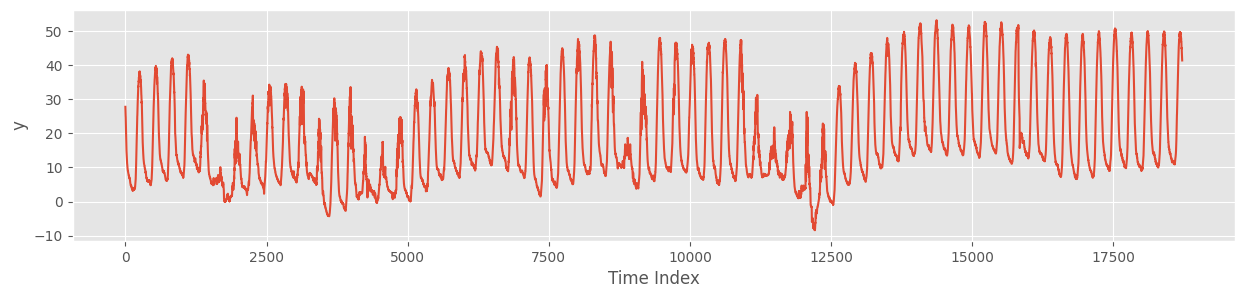

In [9]:
plt.figure(figsize = (15, 3))
plt.plot(df.y)
plt.xlabel('Time Index')
plt.ylabel('y');

In [13]:
# Predict the next 5 min based on the last hour.
m = NeuralProphet(
    n_lags=12,
    changepoints_range=0.95,
    n_changepoints=30,
    daily_seasonality=True,
    weekly_seasonality=False,
    yearly_seasonality=False,
)
metrics = m.fit(df);

INFO - (NP.df_utils._infer_frequency) - Major frequency 5T corresponds to 99.995% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as 5T
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 88


  0%|          | 0/156 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.09E-01, min: 1.21E+00


  0%|          | 0/156 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.09E-01, min: 2.07E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.06E-01
Epoch[88/88]: 100%|██████████| 88/88 [01:18<00:00,  1.12it/s, SmoothL1Loss=6.92e-5, MAE=0.301, RMSE=0.61, Loss=4.73e-5, RegLoss=0]   


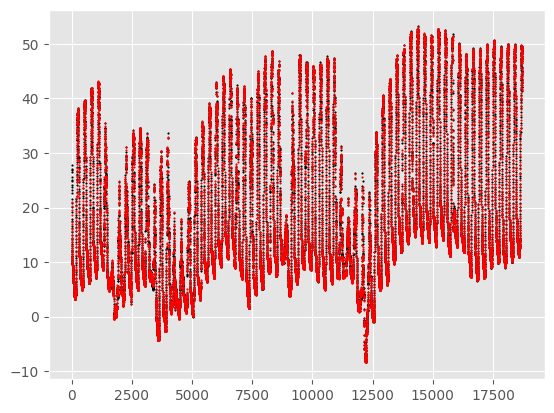

In [22]:
# forecast = m.predict(df)
plt.scatter(forecast.index, forecast.y, color = 'black', label = 'Actual', s = 1)
plt.scatter(forecast.index, forecast.yhat1, color = 'red', label = 'Pred', s = 1);